In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.tabular import *

# Rossmann

## Data preparation

To create the feature-engineered *train_clean* and *test_clean* from the Kaggle competition data, run `rossman_data_clean.ipynb`. One important step that deals with time series is this:

```python
add_datepart(train, "Date", drop=False)
add_datepart(test, "Date", drop=False)
```

In [4]:
path = Path('data/rossmann/')
path.ls()

[PosixPath('data/rossmann/joined'),
 PosixPath('data/rossmann/state_names.csv'),
 PosixPath('data/rossmann/test_clean'),
 PosixPath('data/rossmann/train_clean'),
 PosixPath('data/rossmann/googletrend.csv'),
 PosixPath('data/rossmann/sample_submission.csv'),
 PosixPath('data/rossmann/test.csv'),
 PosixPath('data/rossmann/df'),
 PosixPath('data/rossmann/store.csv'),
 PosixPath('data/rossmann/train.csv'),
 PosixPath('data/rossmann/joined_test'),
 PosixPath('data/rossmann/weather.csv'),
 PosixPath('data/rossmann/store_states.csv')]

In [5]:
train_df = pd.read_pickle(path / 'train_clean')

In [6]:
train_df.head().T

,0,1,2,3,4
index,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,False,False,False,False,False
SchoolHoliday,1,1,1,1,1


In [7]:
n = len(train_df); n

844338

### Experimenting with a sample

In [11]:
idx = np.random.permutation(range(n))[:2000]
idx.sort()

In [12]:
small_train_df = train_df.iloc[idx[:1000]]
small_test_df = train_df.iloc[idx[1000:]]
small_cont_vars = ['CompetitionDistance', 'Mean_Humidity']
small_cat_vars = ['Store', 'DayOfWeek', 'PromoInterval']
small_train_df = small_train_df[small_cat_vars + small_cont_vars + ['Sales']]
small_test_df = small_test_df[small_cat_vars + small_cont_vars + ['Sales']]

In [13]:
small_train_df.head()

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales
245,246,5,NaN,4660.0,70,10031
523,525,5,NaN,1870.0,61,10461
2403,178,3,NaN,1710.0,55,10766
2501,276,3,"Mar,Jun,Sept,Dec",2960.0,55,3944
3547,209,2,"Jan,Apr,Jul,Oct",11680.0,90,7521


In [14]:
small_test_df.head()

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales
407390,27,2,"Jan,Apr,Jul,Oct",60.0,63,15278
407789,426,2,NaN,250.0,63,7667
408380,1017,2,NaN,110.0,80,11214
409325,847,1,"Feb,May,Aug,Nov",190.0,64,10440
410122,498,6,"Jan,Apr,Jul,Oct",990.0,75,8645


In [15]:
categorify = Categorify(small_cat_vars, small_cont_vars)

In [16]:
categorify(small_train_df)
categorify(small_test_df, test=True)

In [17]:
small_test_df.head()

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales
407390,27.0,2,"Jan,Apr,Jul,Oct",60.0,63,15278
407789,426.0,2,NaN,250.0,63,7667
408380,NaN,2,NaN,110.0,80,11214
409325,847.0,1,"Feb,May,Aug,Nov",190.0,64,10440
410122,498.0,6,"Jan,Apr,Jul,Oct",990.0,75,8645


In [18]:
small_train_df.PromoInterval.cat.categories

Index(['Feb,May,Aug,Nov', 'Jan,Apr,Jul,Oct', 'Mar,Jun,Sept,Dec'], dtype='object')

In [19]:
small_train_df['PromoInterval'].cat.codes[:5]

245    -1
523    -1
2403   -1
2501    2
3547    1
dtype: int8

In [20]:
fill_missing = FillMissing(small_cat_vars, small_cont_vars)

In [21]:
fill_missing(small_train_df)
fill_missing(small_test_df, test=True)

Exception: There are nan values in field CompetitionDistance but there were none in the training set. 
                Please fix those manually.

Fix the previous error: https://forums.fast.ai/t/there-are-nan-values-in-field-but-there-were-none-in-the-training-set/32260?u=cedric

In [66]:
small_test_df.CompetitionDistance.isnull().sum()

4

In [75]:
small_test_df[small_test_df["CompetitionDistance"].isnull()]

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales
413591,NaN,3,NaN,NaN,77,3793
592154,NaN,6,NaN,NaN,79,4936
620431,NaN,5,NaN,NaN,68,5776
810783,NaN,3,"Feb,May,Aug,Nov",NaN,88,3839


In [77]:
filler = small_test_df.loc[:,'CompetitionDistance'].median()
print(filler)
small_test_df.loc[:,'CompetitionDistance'] = small_test_df.loc[:,'CompetitionDistance'].fillna(filler)
# small_test_df[small_test_df["CompetitionDistance"] == filler]

2290.0


In [79]:
fill_missing(small_test_df, test=True)

In [ ]:
# small_train_df[small_train_df['CompetitionDistance_na'] == True]

### Preparing full data set

In [81]:
train_df = pd.read_pickle(path / 'train_clean')
test_df = pd.read_pickle(path / 'test_clean')

In [82]:
len(train_df), len(test_df)

(844338, 41088)

In [83]:
procs = [FillMissing, Categorify, Normalize]

In [84]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen',
    'Promo2Weeks', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear',
    'State', 'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_fw', 'StateHoliday_bw',
    'SchoolHoliday_fw', 'SchoolHoliday_bw']

cont_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']

In [85]:
dep_var = 'Sales'
df = train_df[cat_vars + cont_vars + [dep_var, 'Date']].copy()

In [86]:
test_df['Date'].min(), test_df['Date'].max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [87]:
cut = train_df['Date'][(train_df['Date'] == train_df['Date'][len(test_df)])].index.max()
cut

41395

In [88]:
valid_idx = range(cut)

In [93]:
df[dep_var].head()

0     5263
1     6064
2     8314
3    13995
4     4822
Name: Sales, dtype: int64

In [94]:
data = (TabularList.from_df(df, path=path, cat_names=cat_vars, cont_names=cont_vars, procs=procs)
                   .split_by_idx(valid_idx)
                   .label_from_df(cols=dep_var, label_cls=FloatList, log=True)
                   .databunch())

In [95]:
doc(FloatList)

## Model

In [96]:
max_log_y = np.log(np.max(train_df['Sales'])*1.2)
y_range = torch.tensor([0, max_log_y], device=defaults.device)

In [98]:
learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04,
                        y_range=y_range, metrics=exp_rmspe)

In [99]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(1116, 81)
    (1): Embedding(8, 5)
    (2): Embedding(4, 3)
    (3): Embedding(13, 7)
    (4): Embedding(32, 11)
    (5): Embedding(3, 3)
    (6): Embedding(26, 10)
    (7): Embedding(27, 10)
    (8): Embedding(5, 4)
    (9): Embedding(4, 3)
    (10): Embedding(4, 3)
    (11): Embedding(24, 9)
    (12): Embedding(9, 5)
    (13): Embedding(13, 7)
    (14): Embedding(53, 15)
    (15): Embedding(22, 9)
    (16): Embedding(7, 5)
    (17): Embedding(7, 5)
    (18): Embedding(4, 3)
    (19): Embedding(4, 3)
    (20): Embedding(9, 5)
    (21): Embedding(9, 5)
    (22): Embedding(3, 3)
    (23): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.04)
  (bn_cont): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=233, out_features=1000, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    

In [100]:
len(data.train_ds.cont_names)

16

In [101]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


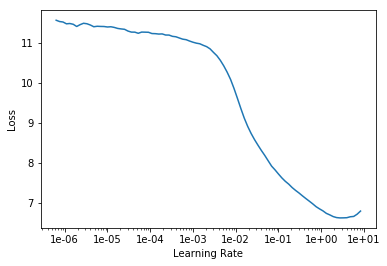

In [128]:
learn.recorder.plot(skip_start=10, skip_end=0)

In [129]:
learn.fit_one_cycle(5, 1e-3, wd=0.2)

epoch,train_loss,valid_loss,exp_rmspe
1,0.021942,0.024053,0.155830
2,0.019645,0.017017,0.129867
3,0.016388,0.021986,0.120790
4,0.012060,0.012576,0.110928
5,0.009612,0.010940,0.103163


In [130]:
learn.save('1')

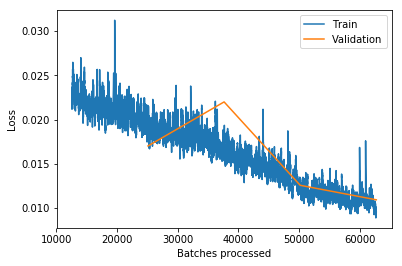

In [131]:
learn.recorder.plot_losses(last=-1)

In [132]:
learn.load('1')

Learner(data=TabularDataBunch;

Train: LabelList
y: FloatList (802943 items)
[FloatItem 9.022926, FloatItem 8.443546, FloatItem 8.547528, FloatItem 8.92758, FloatItem 9.091557]...
Path: data/rossmann
x: TabularList (802943 items)
[TabularLine Store 1115; DayOfWeek 5; Year 2015; Month 6; Day 19; StateHoliday False; CompetitionMonthsOpen 24; Promo2Weeks 25; StoreType d; Assortment c; PromoInterval Mar,Jun,Sept,Dec; CompetitionOpenSinceYear 1900; Promo2SinceYear 2012; State HE; Week 25; Events Rain; Promo_fw 1.0; Promo_bw 5.0; StateHoliday_fw 0.0; StateHoliday_bw 0.0; SchoolHoliday_fw 0.0; SchoolHoliday_bw 0.0; CompetitionDistance_na False; CloudCover_na False; CompetitionDistance -0.0130; Max_TemperatureC 0.1333; Mean_TemperatureC 0.4683; Min_TemperatureC 0.8602; Max_Humidity 0.0780; Mean_Humidity -0.3412; Min_Humidity -0.0811; Max_Wind_SpeedKm_h -0.1780; Mean_Wind_SpeedKm_h 0.1902; CloudCover 0.2552; trend 0.4066; trend_DE 0.5969; AfterStateHoliday -0.7329; BeforeStateHoliday 1.1848; Pr

In [133]:
learn.fit_one_cycle(5, 3e-4)

epoch,train_loss,valid_loss,exp_rmspe
1,0.012550,0.012367,0.106852
2,0.012358,0.021246,0.111081
3,0.011525,0.014918,0.111002
4,0.009461,0.017571,0.111387
5,0.009007,0.017285,0.108684


In [134]:
learn.fit_one_cycle(5, 3e-4)

epoch,train_loss,valid_loss,exp_rmspe
1,0.010818,0.020555,0.116035
2,0.011677,0.015560,0.112247
3,0.010527,0.014982,0.119206
4,0.011010,0.017705,0.107552
5,0.009523,0.015204,0.112792


In [135]:
learn.save('2')

(10th place in the competition was 0.108)

## fin